## Clustering & PCA Assignment by Sachin Katiyar

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd

In [2]:
#Reading Country-data.csv file and storing it in dataframe named df (enter file path as required)
df=pd.read_csv(r"Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
#Describing dataframe df
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [4]:
# Info regarding dataframe, no null values found
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
#Since health, imports and exports are given as percentage of gdpp therefore converting them to actual values.
df['health'] = df['health'] * df['gdpp'] / 100
df['imports'] = df['imports'] * df['gdpp'] / 100
df['exports'] = df['exports'] * df['gdpp'] / 100

In [6]:
#importing libraries for graph making and visualization
import matplotlib.pyplot as plt
import seaborn as sns

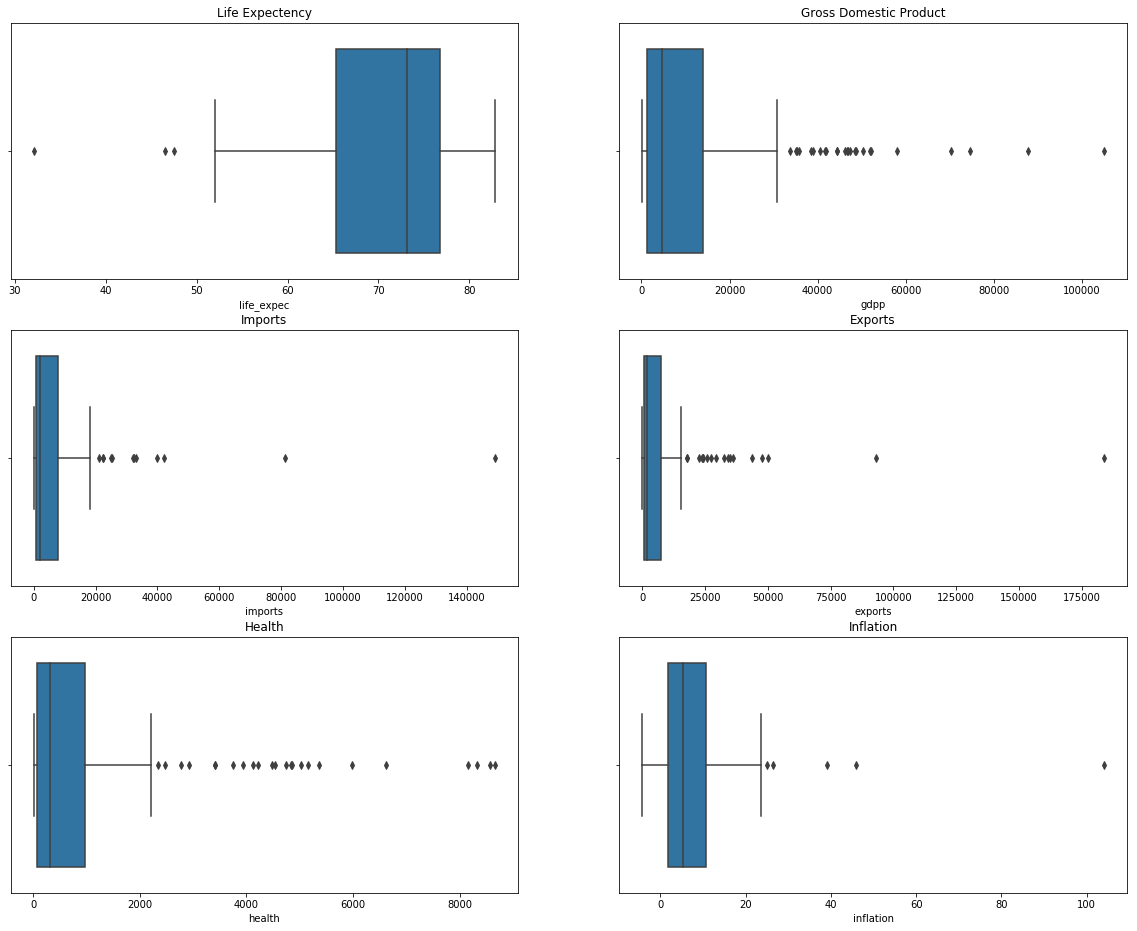

In [7]:
# Plotting boxplot for all numerical variables for outlier analysis.
plt.figure(figsize=(20,16))
plt.subplot(3,2,1)
plt.title("Life Expectency")
sns.boxplot(df["life_expec"])
plt.subplot(3,2,2)
plt.title("Gross Domestic Product")
sns.boxplot(df["gdpp"])
plt.subplot(3,2,3)
plt.title("Imports")
sns.boxplot(df["imports"])
plt.subplot(3,2,4)
plt.title("Exports")
sns.boxplot(df["exports"])
plt.subplot(3,2,5)
plt.title("Health")
sns.boxplot(df["health"])
plt.subplot(3,2,6)
plt.title("Inflation")
sns.boxplot(df["inflation"])
plt.show()

In [8]:
# A lot of outlier exists but we can't remove them as they are the ones that will lead us to the result.
# For eg: outliers in life_expec are for the countries which are in need of aid.
# Also our dataset is very small, removing these outliers will leave us with very less data to analyse on.

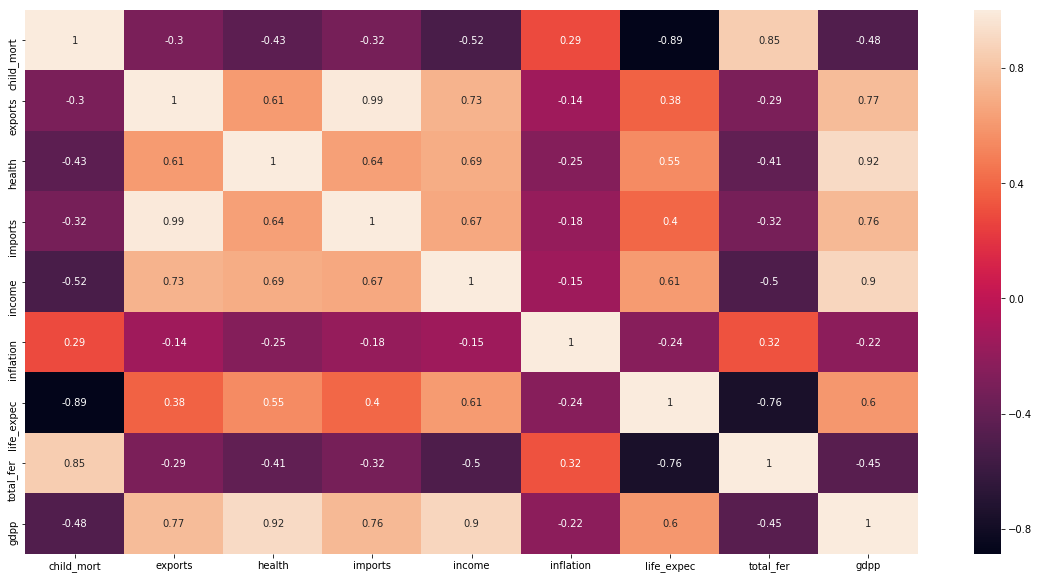

In [9]:
#Bivariate analyisis on numerical columns to check for correlation between variables
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [10]:
#From the above correlation matrix, correlation can be observed between below points:
# 1. income is highly positively correlated with gdp which means high income of individuals will help in increasing gdp of the country.
# 2. total-fertility is also highly positively correlated with child mortality which shows that if a women gives many births
# then death of children below 5 years will be much more.
# 3. child mortality is highly negatively correlated with life expectency which shows that if death of children below 5 years is much more
# then average no of years a child live will be much less (which is simple maths).
# 4. total fertility is highly negatively correlated with life expectency which shows that if a women gives many births then
# average no of years a child live will be much less.
# We can see that point 2 , 3 and 4 are related to each other.

In [11]:
#Splitting data to get target variable and dependent variables in different dataframe for further processing
X_df=df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]
Y_df=df[["country"]]

In [12]:
# importing library for scaling dependent variables and scaling them
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
X_scaled_df = preprocessing.StandardScaler().fit_transform(X_df)
X_scaled_df

C:\Users\skatiyar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\skatiyar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [13]:
# Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized',random_state=100)

In [14]:
# Applyinh PCA on X_scaled_df datframe
X_pca=pca.fit(X_scaled_df)

In [15]:
X_pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='randomized', tol=0.0, whiten=False)

In [16]:
pca.explained_variance_ratio_.cumsum()

array([0.58937298, 0.77382467, 0.87293939, 0.93366217, 0.96395389,
       0.98855216, 0.9979496 , 0.99950602, 1.        ])

In [17]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

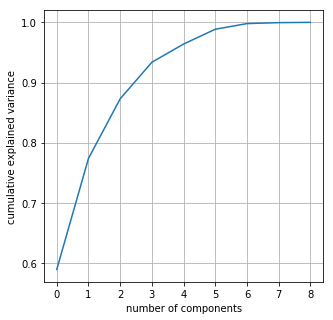

In [18]:
#Plotting graph to access the number of principal components needed
plt.figure(figsize=(5,5))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid(True)
plt.show()

In [19]:
#From the above graph and pca explained_variance_ratio cumsum, we can see that about 96% variance can be explained by 5 components.
# Therefore we will proceed with 5 components further.
# Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [20]:
#Basis transformation - getting the data onto our PCs
X_pca_final = pca_final.fit_transform(X_scaled_df)
X_pca_final_df=pd.DataFrame(X_pca_final)
print(X_pca_final_df)

            0         1         2         3         4
0   -2.636338  1.472260 -0.548330  0.238302  0.061003
1   -0.023783 -1.435535 -0.015470 -0.428278 -0.154305
2   -0.459228 -0.679705  0.956537 -0.193531 -0.092128
3   -2.723472  2.174966  0.597397  0.417695  0.056694
4    0.649103 -1.026404 -0.258645 -0.276882  0.077087
5    0.035950 -0.685692  1.468419  0.046032 -0.093193
6   -0.334457 -1.278617  0.190805 -0.477019 -0.253557
7    3.184039 -0.239407 -0.131692  1.674379  0.087368
8    3.817742  0.262449 -0.258554  1.024658 -0.299611
9   -0.468005 -0.493948  0.611514 -0.276291  0.115536
10   1.499464 -0.425404 -0.543189  0.254181 -0.109091
11   1.471433 -0.326327  0.397744 -0.217919  0.796269
12  -1.015269 -0.713954 -0.102950 -0.354866 -0.254570
13   0.844643 -1.009520 -0.411579 -0.116555 -0.202066
14  -0.015189 -0.986231  0.896114 -0.513360 -0.046737
15   3.961035  0.837822 -0.271866  0.311798 -0.533686
16  -0.403754 -0.923973 -0.505497 -0.355780 -0.093195
17  -2.364235  1.173529 -1.2

In [21]:
# Creating correlation matrix for the principal components
corrmatrix = np.corrcoef(X_pca_final_df.transpose())
print(corrmatrix)

[[ 1.00000000e+00  8.95967973e-04 -3.43490594e-05 -3.67755465e-03
  -3.09237607e-03]
 [ 8.95967973e-04  1.00000000e+00  7.35197281e-05 -1.37774134e-02
  -1.17495000e-02]
 [-3.43490594e-05  7.35197281e-05  1.00000000e+00  6.15541928e-05
  -5.85496474e-04]
 [-3.67755465e-03 -1.37774134e-02  6.15541928e-05  1.00000000e+00
   4.75010096e-02]
 [-3.09237607e-03 -1.17495000e-02 -5.85496474e-04  4.75010096e-02
   1.00000000e+00]]


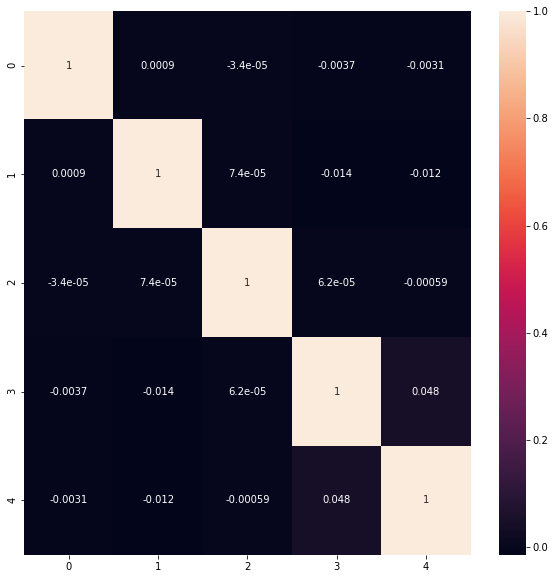

In [22]:
# Plotting heatmap and checking for correlation between principal components
plt.figure(figsize = (10,10))
sns.heatmap(corrmatrix,annot = True)
plt.show()

In [23]:
# Finding minimum and maximum correlation in above plot, as observed no correlation observed between variables. 
corrmatrix_without_diagonal = corrmatrix - np.diagflat(corrmatrix.diagonal())
print("max corr:",corrmatrix_without_diagonal.max(), ", min corr: ", corrmatrix_without_diagonal.min(),)

max corr: 0.04750100962092804 , min corr:  -0.013777413350895896


In [24]:
#Create dataframe named final_components_df of components from PCA
final_components_df = pd.DataFrame({'PC_1':pca.components_[0],'PC_2':pca.components_[1],'PC_3':pca.components_[2],
                                    'PC_4':pca.components_[3],'PC_5':pca.components_[4],'Columns':X_df.columns })
final_components_df

,PC_1,PC_2,PC_3,PC_4,PC_5,Columns
0,-0.316392,0.476267,-0.150012,-0.148052,0.101995,child_mort
1,0.342887,0.397311,-0.030574,0.449425,-0.038538,exports
2,0.358535,0.155053,-0.075703,-0.599712,-0.493200,health
3,0.344865,0.370781,-0.072174,0.461798,-0.252787,imports
4,0.380041,0.128384,0.145764,-0.154806,0.794075,income
5,-0.143085,0.221261,0.948419,-0.007628,-0.136423,inflation
6,0.343857,-0.369820,0.196752,-0.018395,-0.154041,life_expec
7,-0.302842,0.459715,-0.077834,-0.213928,-0.020336,total_fer
8,0.399988,0.200624,0.010339,-0.364772,0.087501,gdpp


In [25]:
# Merging country names and all the Principal components and creating a final df named df_country_final
df_final = pd.DataFrame({'PC_1':X_pca_final_df[0],'PC_2':X_pca_final_df[1],'PC_3':X_pca_final_df[2],'PC_4':X_pca_final_df[3],'PC_5':X_pca_final_df[4]})
country=pd.DataFrame()
df_country_final=pd.merge(df['country'],df_final, left_index=True,right_index=True)
print(df_country_final.head())

               country      PC_1      PC_2      PC_3      PC_4      PC_5
0          Afghanistan -2.636338  1.472260 -0.548330  0.238302  0.061003
1              Albania -0.023783 -1.435535 -0.015470 -0.428278 -0.154305
2              Algeria -0.459228 -0.679705  0.956537 -0.193531 -0.092128
3               Angola -2.723472  2.174966  0.597397  0.417695  0.056694
4  Antigua and Barbuda  0.649103 -1.026404 -0.258645 -0.276882  0.077087


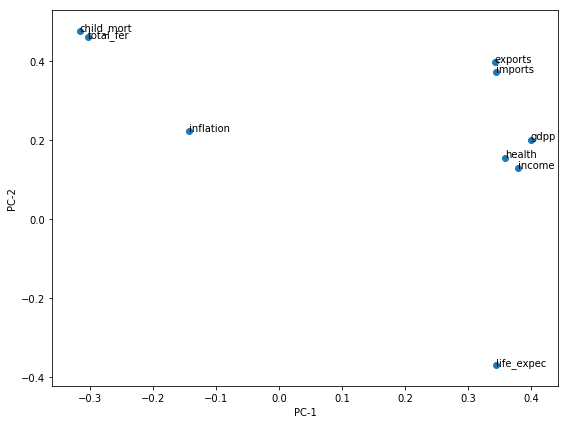

In [26]:
#Plotting variables against PC_1 and PC_2
plt.figure(figsize = (8,6))
plt.scatter(final_components_df["PC_1"], final_components_df["PC_2"])
plt.xlabel('PC-1')
plt.ylabel('PC-2')
for i, txt in enumerate(final_components_df["Columns"]):
    plt.annotate(txt, (final_components_df.PC_1[i],final_components_df.PC_2[i]))
plt.tight_layout()
plt.show()

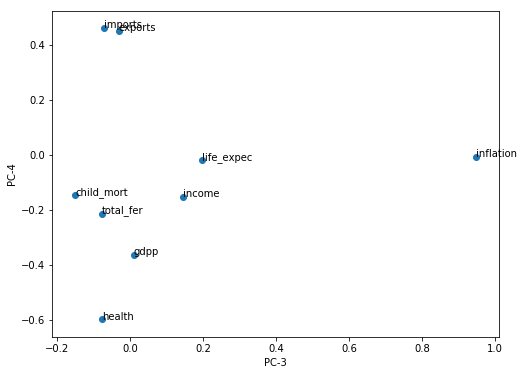

In [27]:
#Plotting variables against PC_3 and PC_4
plt.figure(figsize = (8,6))
plt.scatter(final_components_df["PC_3"], final_components_df["PC_4"])
plt.xlabel('PC-3')
plt.ylabel('PC-4')
for i, txt in enumerate(final_components_df["Columns"]):
    plt.annotate(txt, (final_components_df.PC_3[i],final_components_df.PC_4[i]))
plt.show()

In [28]:
#Based on the above scatter plots, we can see that:
#PC_1 is in the direction of life_expec, income, gdpp and health. 
#PC_2 is in the direction of child_mort and total_fer. 
#PC_3 is in the direction of inflation. 
#PC_4 is in the direction of exports and imports.

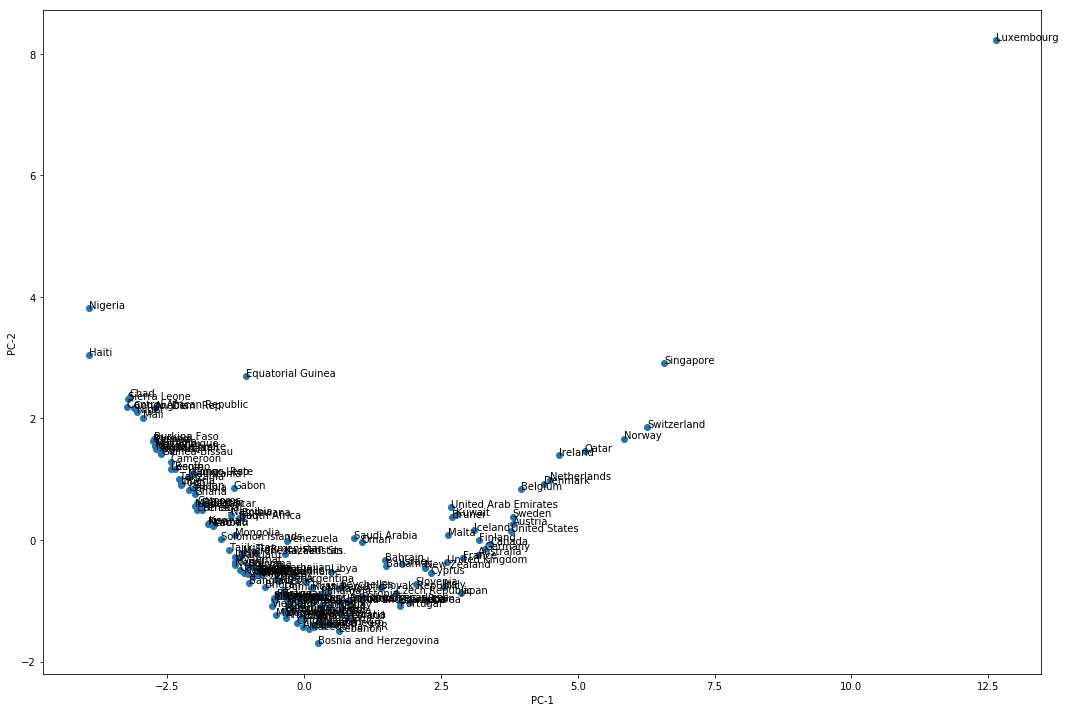

In [29]:
#Plotting countries between PC_1 and PC_2
plt.figure(figsize = (15,10))
plt.scatter(df_country_final["PC_1"], df_country_final["PC_2"])
plt.xlabel('PC-1')
plt.ylabel('PC-2')
for i, txt in enumerate(df_country_final.country):
    plt.annotate(txt, (df_country_final.PC_1[i],df_country_final.PC_2[i]))
plt.tight_layout()
plt.show()

In [30]:
# From above graph we can say that countries which are on top leftmost corner are the ones which are in need of aid as for them
# PC_2 value is high and PC_1 value is low. If PC_2 value is high then it means that "child_mort and total_fer" is much more and
# "life_expec, income, gdpp and health" having low values.

### K-means Clustering

In [31]:
from sklearn.cluster import KMeans

In [32]:
# Now we will see the Hopkins Statistics to check if our dataset is good for clustering 
# Value above 90 will give us surety that data is good for clustering.
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [33]:
# Since value received from hopkins statistics is more than 0.90 therefore we can conclude that data is good for clustering.
hopkins(df_final)

0.9370204108208223

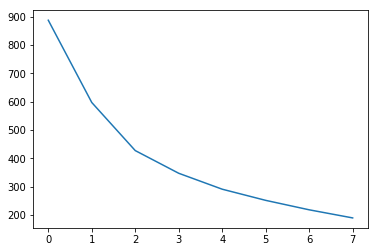

In [34]:
# Elbow curve
ssd = []
for num_clusters in range(2,10):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_final)
    
    ssd.append(kmeans.inertia_)
    
# plotting the SSDs for each n_clusters
plt.plot(ssd)

In [35]:
# Silhouette Score
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(df_final)
    sse_.append([k, silhouette_score(df_final, kmeans.labels_)])
sse_

[[2, 0.48066046782755933],
 [3, 0.45415128979715086],
 [4, 0.46298146414826113],
 [5, 0.4691079772177198],
 [6, 0.4167735862680353],
 [7, 0.3473505140123108],
 [8, 0.35582067666022216],
 [9, 0.3645131149445237]]

In [36]:
# Based on Silhouette score and Elbow curve, K = 3 seems good as there is much bend in elbow curve so we will proceed 
# with K = 3 in K Means
# Thinking about the business perspective, three groups like Developed Countries , Developing Countries and Under-Developed Countries
# are the perfect division boundaries between countries.
# Hence K = 3 seems a reasonable choice from both Statistical and Business view.

In [37]:
# Creating clusters by K-means where K = 3 , max_iter =100 which means it will do 100 iterations and then converge or if it converges before it, it will halt there only.
kclust = KMeans(n_clusters = 3, max_iter=100,random_state = 100)
kclust.fit(df_final)
df_pca_cluster = pd.concat([df_country_final, pd.DataFrame(kclust.labels_)], axis=1)
df_pca_cluster.columns = ['country','PC_1', 'PC_2','PC_3','PC_4','PC_5','cluster_id']
df_pca_cluster.head(10)

,country,PC_1,PC_2,PC_3,PC_4,PC_5,cluster_id
0,Afghanistan,-2.636338,1.472260,-0.548330,0.238302,0.061003,1
1,Albania,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,2
2,Algeria,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,2
3,Angola,-2.723472,2.174966,0.597397,0.417695,0.056694,1
4,Antigua and Barbuda,0.649103,-1.026404,-0.258645,-0.276882,0.077087,2
5,Argentina,0.035950,-0.685692,1.468419,0.046032,-0.093193,2
6,Armenia,-0.334457,-1.278617,0.190805,-0.477019,-0.253557,2
7,Australia,3.184039,-0.239407,-0.131692,1.674379,0.087368,0
8,Austria,3.817742,0.262449,-0.258554,1.024658,-0.299611,0
9,Azerbaijan,-0.468005,-0.493948,0.611514,-0.276291,0.115536,2


In [38]:
# Checking no of countries falling in each cluster.
df_pca_cluster['cluster_id'].value_counts()

2    91
1    48
0    28
Name: cluster_id, dtype: int64

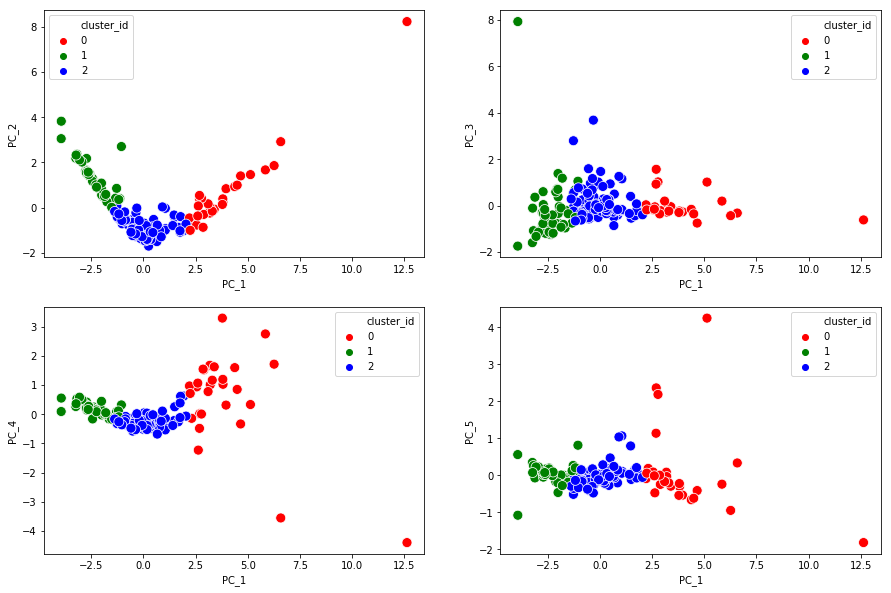

In [39]:
# Plotting scatterplot between PC1-PC2, PC1-PC3, PC1-PC4 and PC1-PC5, taking PC1 with each as PC1 explains most of the variance.
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.scatterplot(x='PC_1',y='PC_2',hue='cluster_id',data=df_pca_cluster,palette=['Red','Green','Blue'],s=100)
plt.subplot(2,2,2)
sns.scatterplot(x='PC_1',y='PC_3',hue='cluster_id',data=df_pca_cluster,palette=['Red','Green','Blue'],s=100)
plt.subplot(2,2,3)
sns.scatterplot(x='PC_1',y='PC_4',hue='cluster_id',data=df_pca_cluster,palette=['Red','Green','Blue'],s=100)
plt.subplot(2,2,4)
sns.scatterplot(x='PC_1',y='PC_5',hue='cluster_id',data=df_pca_cluster,palette=['Red','Green','Blue'],s=100)
plt.show()

In [40]:
# It seems that cluster 1 countries are the under-developed countries and printing them, lets analyse more further.
df_pca_cluster.loc[df_pca_cluster['cluster_id']==1].country.values

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands',
       'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo',
       'Uganda', 'Yemen', 'Zambia'], dtype=object)

In [41]:
# Merging df_pca_cluster with original dataframe df based on country for more analysis.
df_main = pd.merge(df,df_pca_cluster,how='inner',on='country')
print(df_main.head(5))

               country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp      PC_1      PC_2      PC_3  \
0       9.44        56.2       5.82    553 -2.636338  1.472260 -0.548330   
1       4.49        76.3       1.65   4090 -0.023783 -1.435535 -0.015470   
2      16.10        76.5       2.89   4460 -0.459228 -0.679705  0.956537   
3      22.40        60.1       6.16   3530 -2.723472  2.174966  0.597397   
4       1.44        76.8       2.13  12200  0.649103 -1.026404 -0.258645   

       PC_4      PC_5  cluster_id  
0  0.238302  0.061003           1  
1 -0.428278 -0.15430

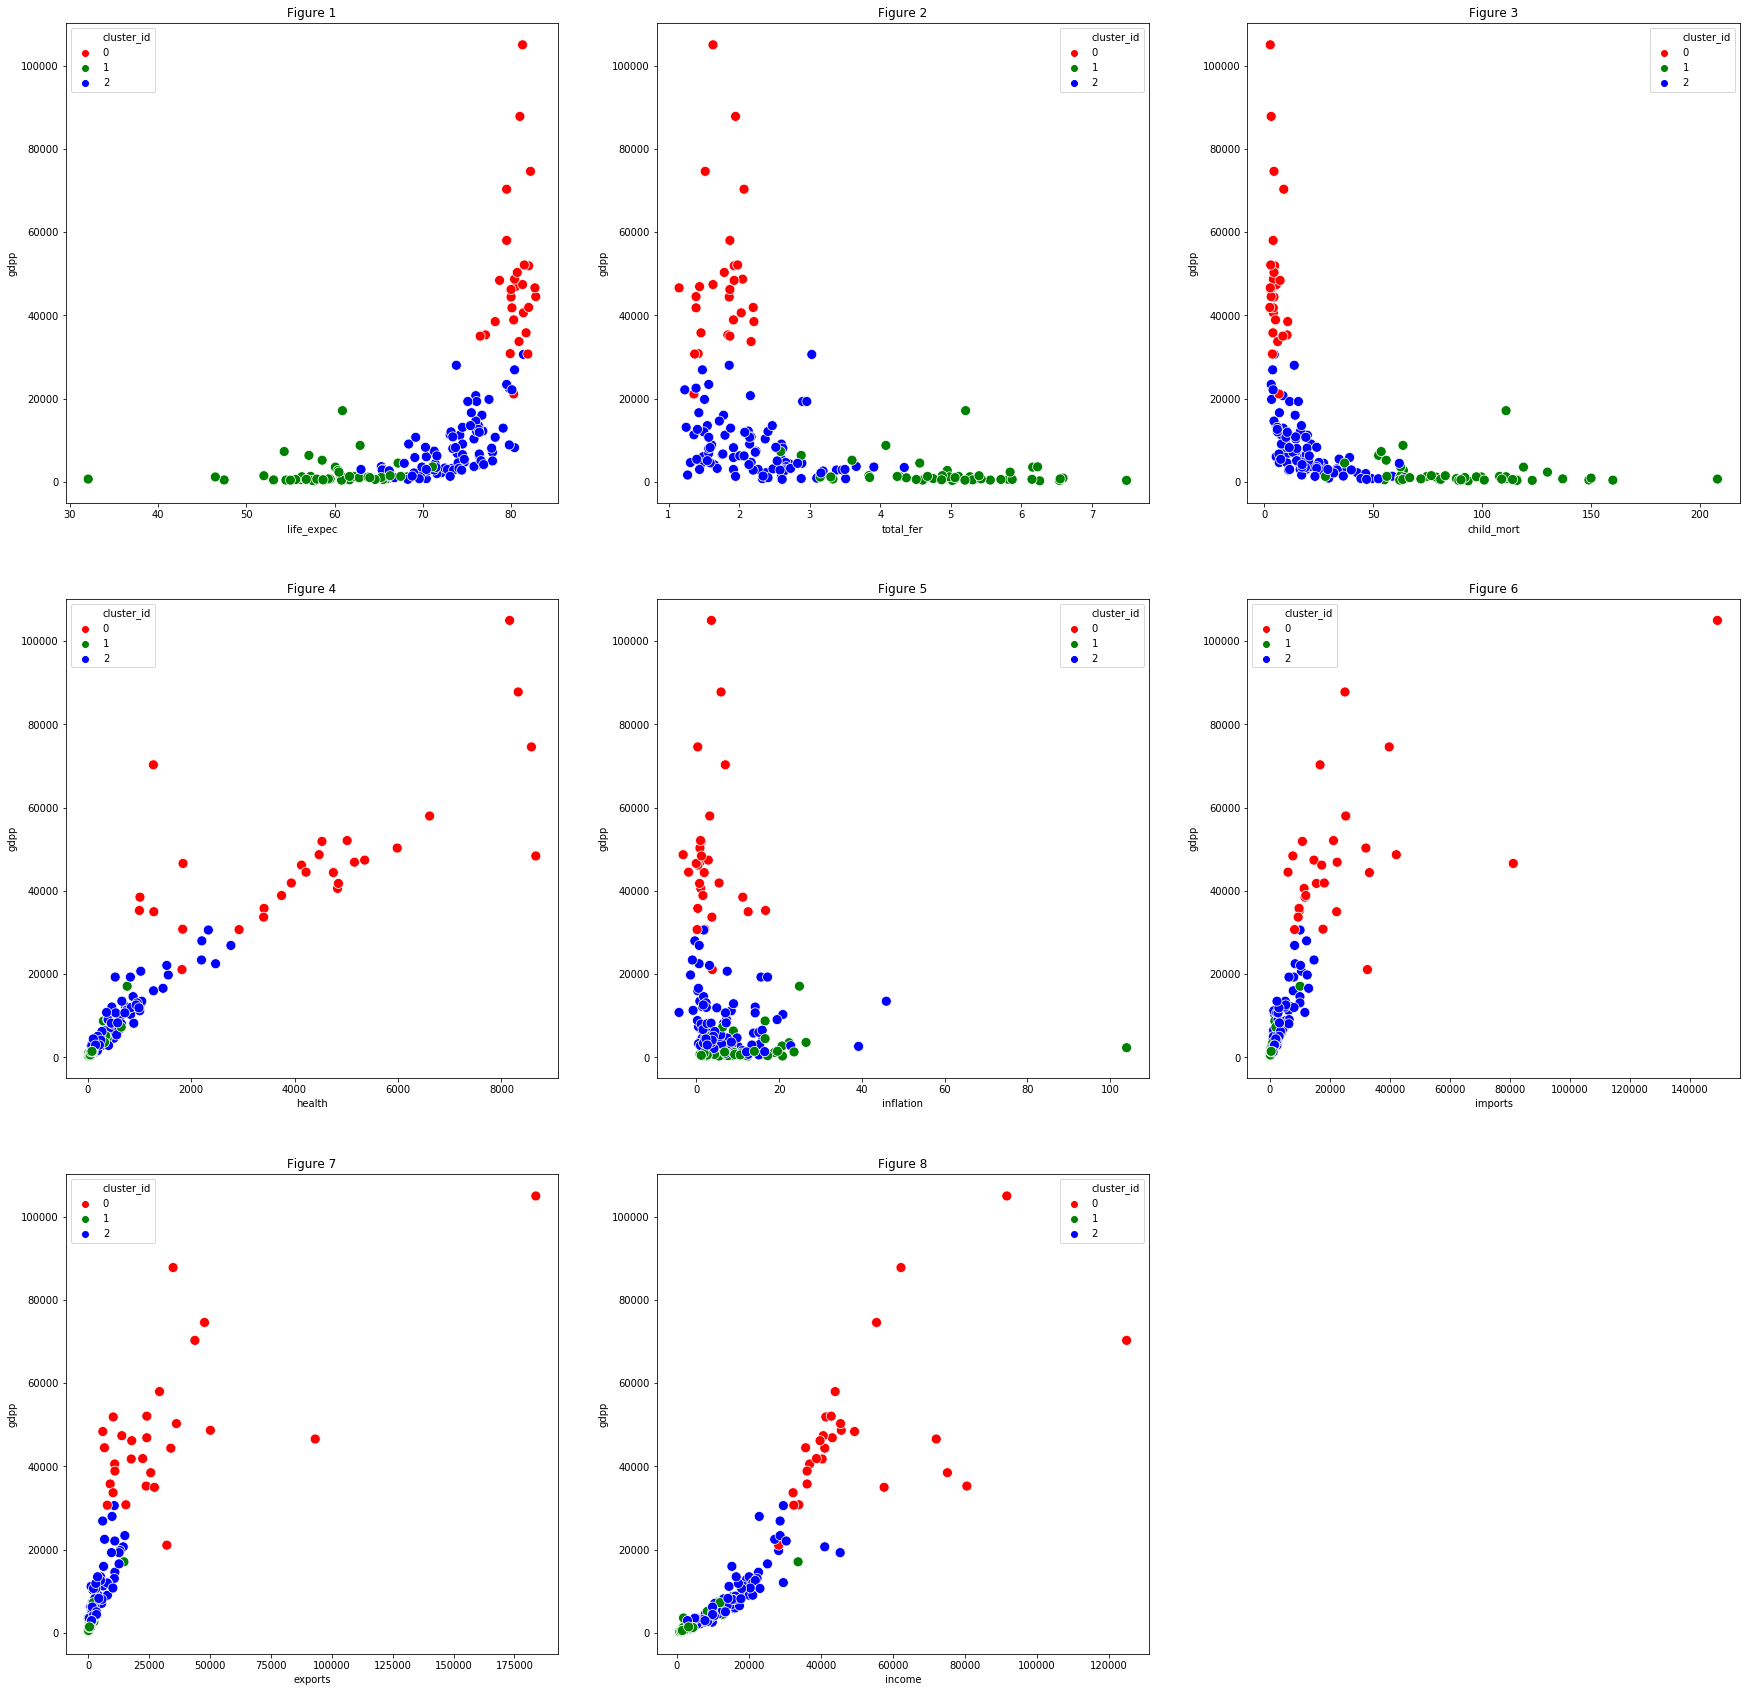

In [42]:
#Plotting scatterplot between different variables taking hue as cluster id.
plt.figure(figsize = (30,30))
plt.subplot(3,3,1)
plt.title("Figure 1")
sns.scatterplot(x='life_expec',y='gdpp',hue='cluster_id',data=df_main,palette=['Red','Green','Blue'],s=100)
plt.subplot(3,3,2)
plt.title("Figure 2")
sns.scatterplot(x='total_fer',y='gdpp',hue='cluster_id',data=df_main,palette=['Red','Green','Blue'],s=100)
plt.subplot(3,3,3)
plt.title("Figure 3")
sns.scatterplot(x='child_mort',y='gdpp',hue='cluster_id',data=df_main,palette=['Red','Green','Blue'],s=100)
plt.subplot(3,3,4)
plt.title("Figure 4")
sns.scatterplot(x='health',y='gdpp',hue='cluster_id',data=df_main,palette=['Red','Green','Blue'],s=100)
plt.subplot(3,3,5)
plt.title("Figure 5")
sns.scatterplot(x='inflation',y='gdpp',hue='cluster_id',data=df_main,palette=['Red','Green','Blue'],s=100)
plt.subplot(3,3,6)
plt.title("Figure 6")
sns.scatterplot(x='imports',y='gdpp',hue='cluster_id',data=df_main,palette=['Red','Green','Blue'],s=100)
plt.subplot(3,3,7)
plt.title("Figure 7")
sns.scatterplot(x='exports',y='gdpp',hue='cluster_id',data=df_main,palette=['Red','Green','Blue'],s=100)
plt.subplot(3,3,8)
plt.title("Figure 8")
sns.scatterplot(x='income',y='gdpp',hue='cluster_id',data=df_main,palette=['Red','Green','Blue'],s=100)
plt.show()

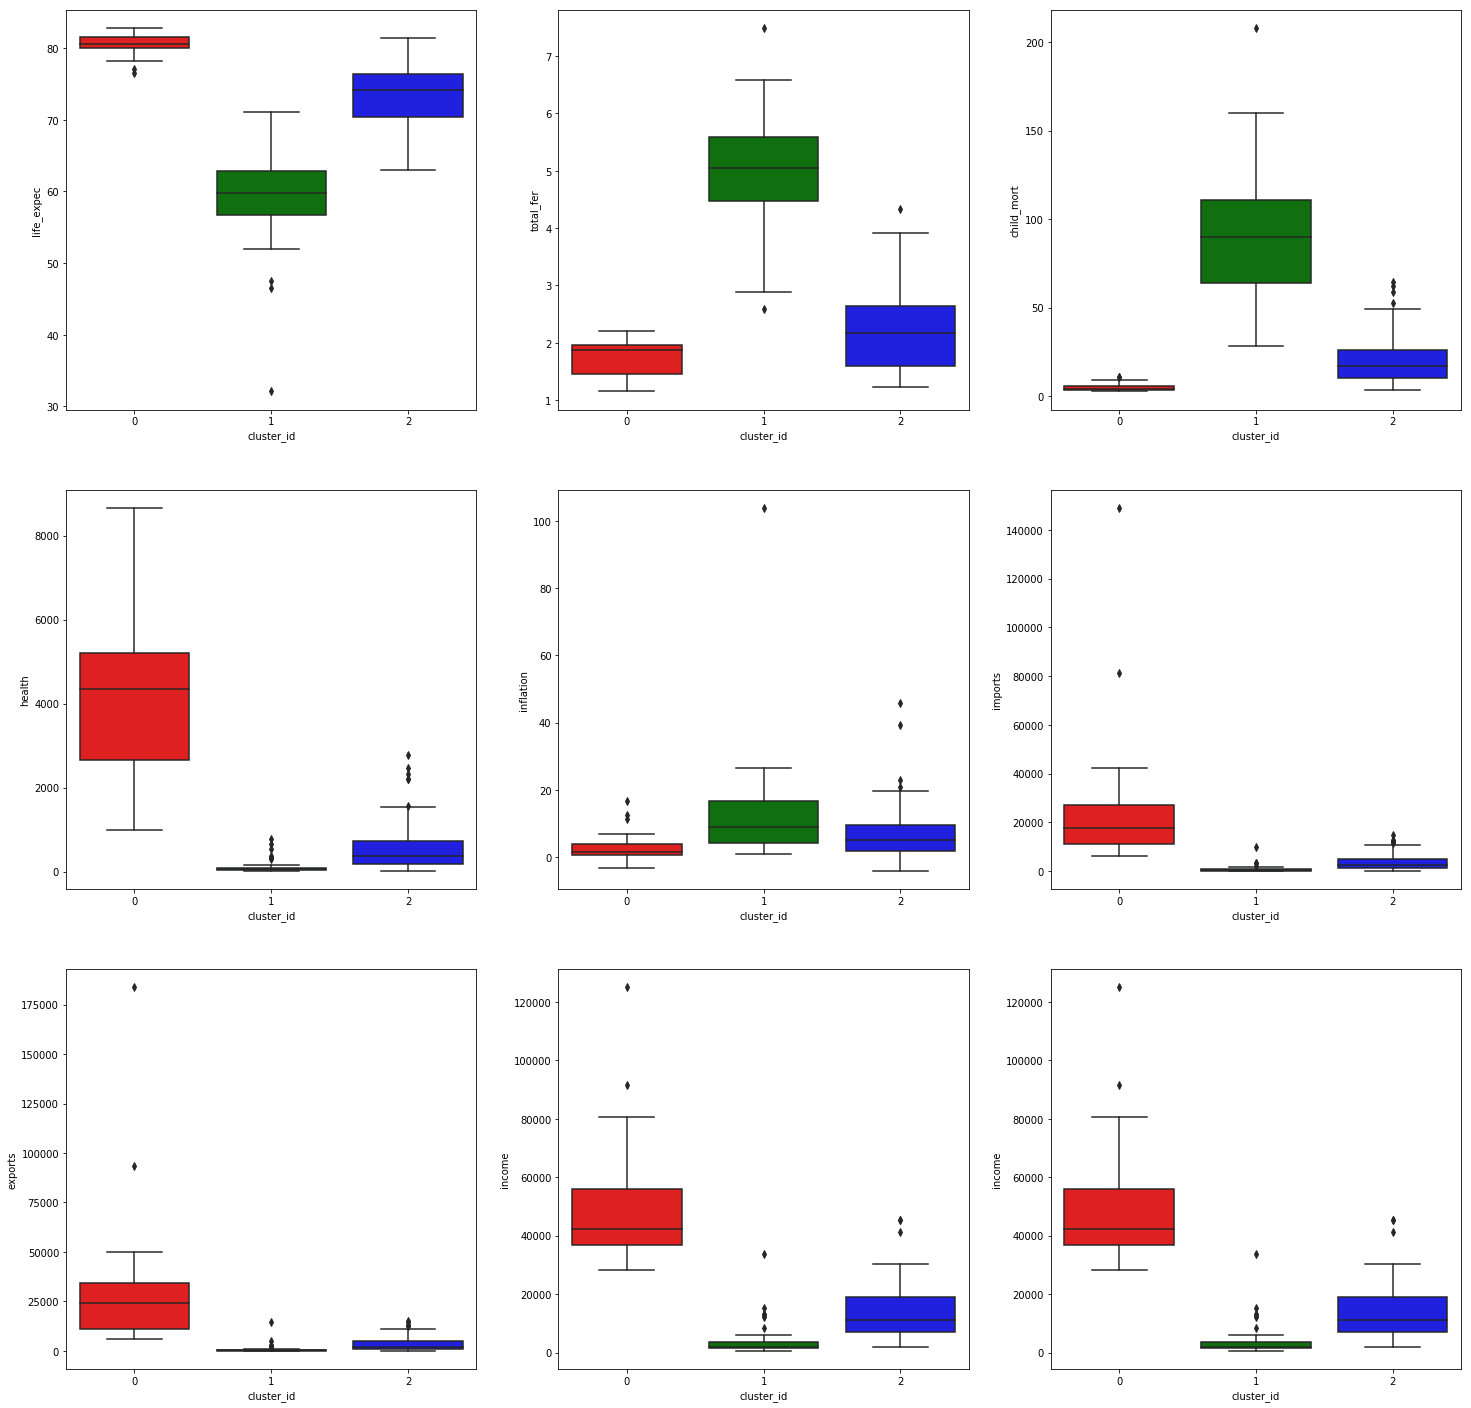

In [43]:
# Plotting boxplots to get better idea of clusters and to give final analysis on the same
plt.figure(figsize = (25,25))
plt.subplot(3,3,1)
sns.boxplot(x='cluster_id',y='life_expec',data=df_main,palette=['Red','Green','Blue'])
plt.subplot(3,3,2)
sns.boxplot(x='cluster_id',y='total_fer',data=df_main,palette=['Red','Green','Blue'])
plt.subplot(3,3,3)
sns.boxplot(x='cluster_id',y='child_mort',data=df_main,palette=['Red','Green','Blue'])
plt.subplot(3,3,4)
sns.boxplot(x='cluster_id',y='health',data=df_main,palette=['Red','Green','Blue'])
plt.subplot(3,3,5)
sns.boxplot(x='cluster_id',y='inflation',data=df_main,palette=['Red','Green','Blue'])
plt.subplot(3,3,6)
sns.boxplot(x='cluster_id',y='imports',data=df_main,palette=['Red','Green','Blue'])
plt.subplot(3,3,7)
sns.boxplot(x='cluster_id',y='exports',data=df_main,palette=['Red','Green','Blue'])
plt.subplot(3,3,8)
sns.boxplot(x='cluster_id',y='income',data=df_main,palette=['Red','Green','Blue'])
plt.subplot(3,3,9)
sns.boxplot(x='cluster_id',y='income',data=df_main,palette=['Red','Green','Blue'])
plt.show()

In [44]:
# From the above scatter plot and box plots, it has been clear that:
# Cluster 0 represents developed countries
# Cluster 1 represents under-developed countries
# Cluster 2 represents developing countries.

# Cluster 1 has low life_expec, high_fertility, high child mortality, low health, low imports/exports, low income and low GDP. 
# These all factors shows that Cluster 1 belongs to under-developed countries.

In [45]:
# Printing under-developed countries as they are in need of aid and storing it in new dataframe named df_ind_dev
df_und_dev=df_main[df_main["cluster_id"]==1]
print(df_und_dev)

                      country  child_mort     exports    health    imports  \
0                 Afghanistan        90.2     55.3000   41.9174    248.297   
3                      Angola       119.0   2199.1900  100.6050   1514.370   
17                      Benin       111.0    180.4040   31.0780    281.976   
21                   Botswana        52.5   2768.6000  527.0500   3257.550   
25               Burkina Faso       116.0    110.4000   38.7550    170.200   
26                    Burundi        93.6     20.6052   26.7960     90.552   
28                   Cameroon       108.0    290.8200   67.2030    353.700   
31   Central African Republic       149.0     52.6280   17.7508    118.190   
32                       Chad       150.0    330.0960   40.6341    390.195   
36                    Comoros        88.2    126.8850   34.6819    397.573   
37           Congo, Dem. Rep.       116.0    137.2740   26.4194    165.664   
38                Congo, Rep.        63.9   2331.7400   67.4040 

In [46]:
# Describing df_und_dev dataframe
print(df_und_dev.describe(percentiles=[0.25,0.50,0.65,0.75,0.95]))

       child_mort       exports      health       imports        income  \
count   48.000000     48.000000   48.000000     48.000000     48.000000   
mean    91.610417    879.063521  114.821765    827.028771   3897.354167   
std     34.319855   2252.474004  165.518331   1540.981910   5590.168621   
min     28.100000     20.605200   12.821200     90.552000    609.000000   
25%     63.675000    102.873750   34.005875    193.319500   1390.000000   
50%     89.750000    196.260000   51.613500    339.306000   1860.000000   
65%    100.415000    361.090700   67.313550    450.915000   2676.500000   
75%    111.000000    552.522500   95.303250    801.000000   3522.500000   
95%    149.650000   2667.877000  475.040000   2745.866500  13090.000000   
max    208.000000  14671.800000  766.080000  10071.900000  33700.000000   

        inflation  life_expec  total_fer          gdpp       PC_1       PC_2  \
count   48.000000   48.000000  48.000000     48.000000  48.000000  48.000000   
mean    11.911

In [47]:
# Based on above description, we are filtering out top 10 countries which are very much in need of aid and printing them.
df_ans = df_und_dev[df_und_dev['gdpp']<=932]
df_ans = df_ans[df_ans['child_mort']>=100]
df_ans = df_ans[df_ans['income']<=1860]
print(df_ans)

                      country  child_mort  exports   health  imports  income  \
17                      Benin       111.0  180.404  31.0780  281.976    1820   
25               Burkina Faso       116.0  110.400  38.7550  170.200    1430   
31   Central African Republic       149.0   52.628  17.7508  118.190     888   
37           Congo, Dem. Rep.       116.0  137.274  26.4194  165.664     609   
63                     Guinea       109.0  196.344  31.9464  279.936    1190   
64              Guinea-Bissau       114.0   81.503  46.4950  192.544    1390   
66                      Haiti       208.0  101.286  45.7442  428.314    1500   
106                Mozambique       101.0  131.985  21.8299  193.578     918   
112                     Niger       123.0   77.256  17.9568  170.868     814   
132              Sierra Leone       160.0   67.032  52.2690  137.655    1220   

     inflation  life_expec  total_fer  gdpp      PC_1      PC_2      PC_3  \
17       0.885        61.8       5.36   75

### Hierarchical Clustering

In [48]:
# importing libraries required for Hierarchial Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

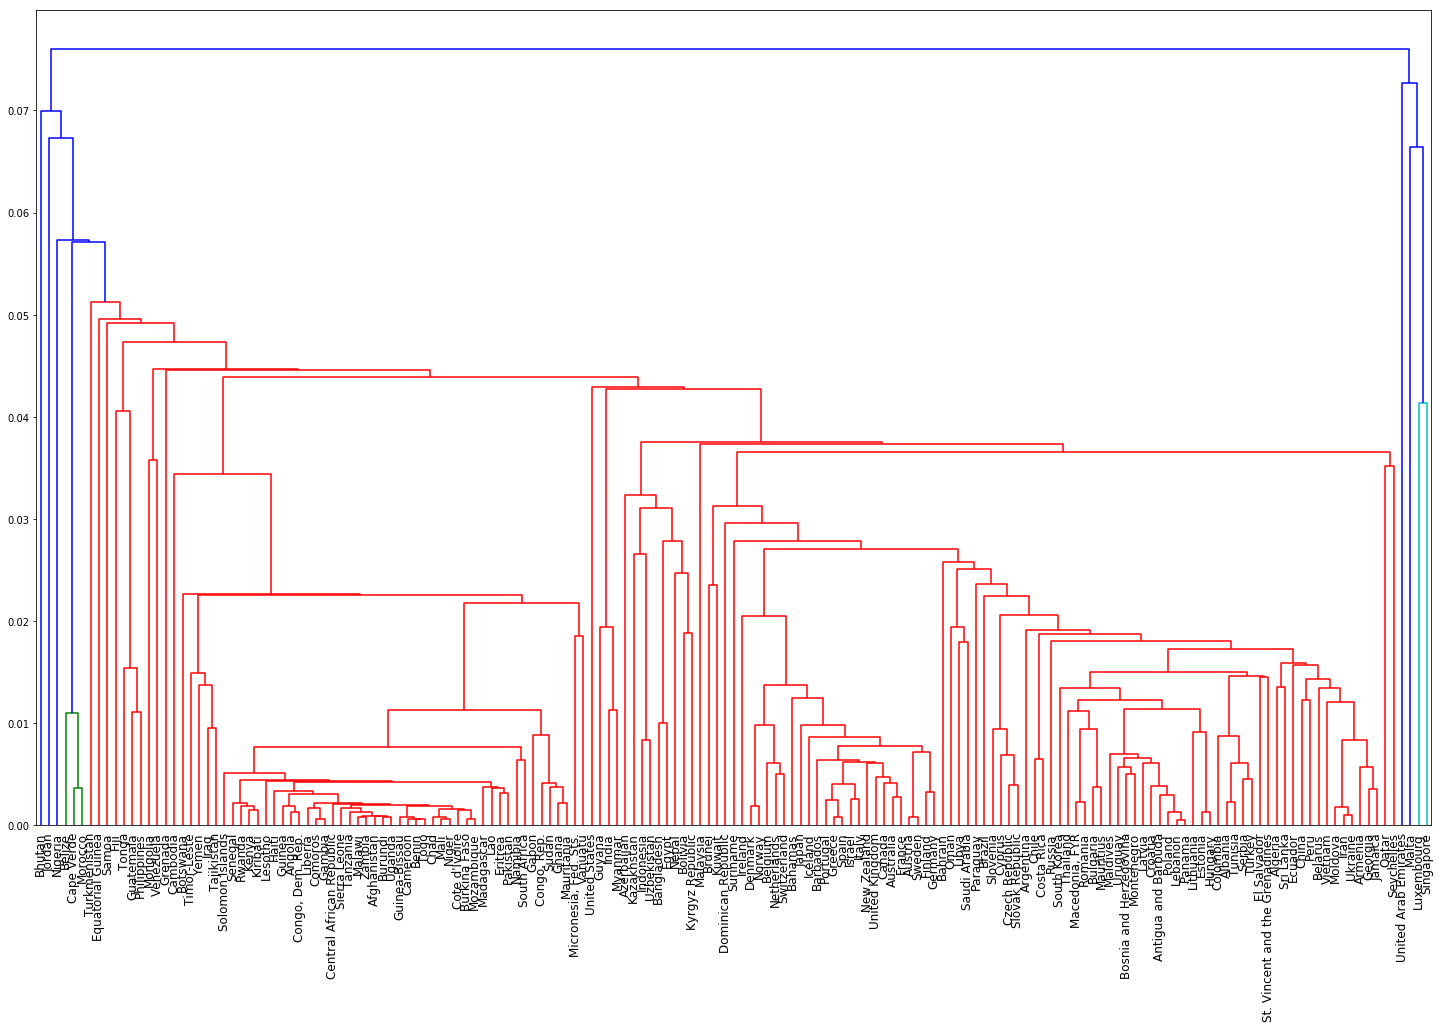

In [49]:
#Plotting dendogram using single linkage and metric as correlation
plt.figure(figsize = (25,15))
mergings_single = linkage(df_final, method = "single", metric='correlation')
dendrogram(mergings_single,leaf_font_size=12,labels=list(df_main["country"]))
plt.show()

In [50]:
# From the above chart we can say that using single linkage for forming clusters are not making much sense as most of the
# countries are clubbed in one cluster. Therefore lets check for complete linkage method.

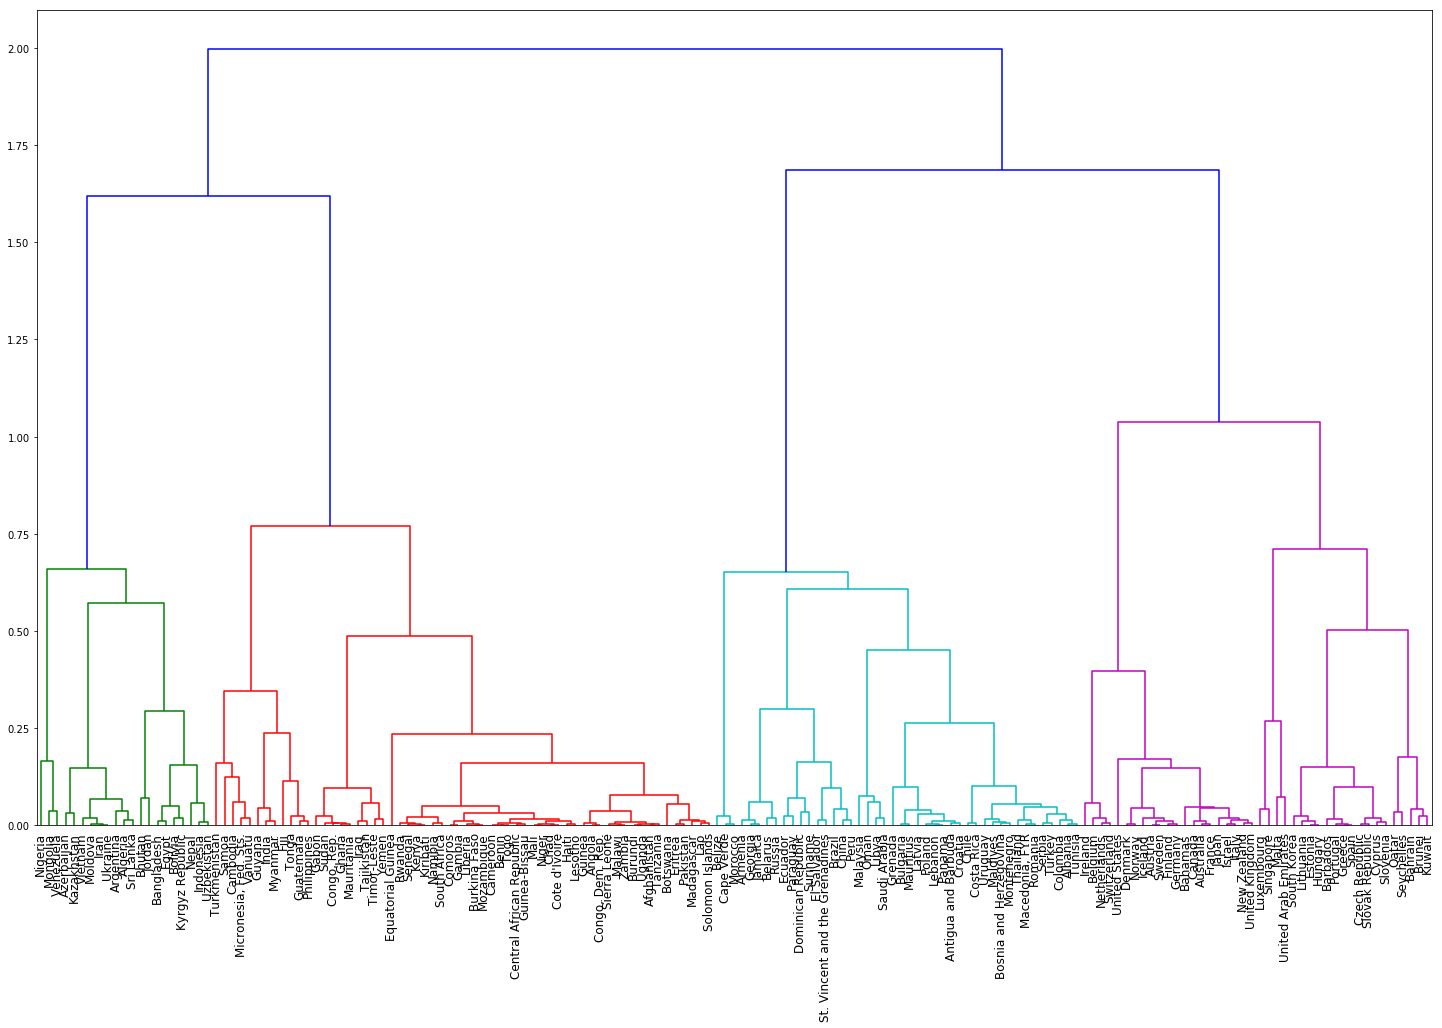

In [51]:
#Plotting dendogram using complete linkage and metric as correlation
plt.figure(figsize = (25,15))
mergings_complete = linkage(df_final, method = "complete", metric='correlation')
dendrogram(mergings_complete,leaf_font_size=12,labels=list(df_main["country"]))
plt.show()

In [52]:
# Based on the above chart, we can say that we have got 4 clusters and they make much more sense, but this is different with 
# what we get in K Means clustering. Lets assign the cluster IDs and analyse them more minutely.
cluster_labels = cut_tree(mergings_complete, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 2, 0, 1, 2, 1, 3, 3, 2, 3, 3, 2, 3, 1, 3, 1, 0, 2, 2, 1, 0,
       1, 3, 1, 0, 0, 0, 0, 3, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 3, 3,
       3, 1, 1, 2, 1, 0, 0, 3, 0, 3, 3, 0, 0, 1, 3, 0, 3, 1, 0, 0, 0, 0,
       0, 3, 3, 0, 2, 2, 0, 3, 3, 3, 1, 3, 2, 2, 0, 0, 3, 2, 0, 1, 1, 0,
       0, 1, 3, 3, 1, 0, 0, 1, 1, 0, 3, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2,
       3, 3, 0, 2, 3, 1, 0, 1, 1, 1, 0, 1, 3, 3, 1, 1, 0, 0, 1, 0, 1, 3,
       0, 3, 3, 3, 0, 0, 3, 3, 2, 1, 0, 1, 3, 3, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 2, 3, 3, 3, 1, 2, 0, 2, 2, 0, 0])

In [53]:
df_final['cluster_labels'] = cluster_labels
df_final.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,cluster_labels
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,0
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,2
3,-2.723472,2.174966,0.597397,0.417695,0.056694,0
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1


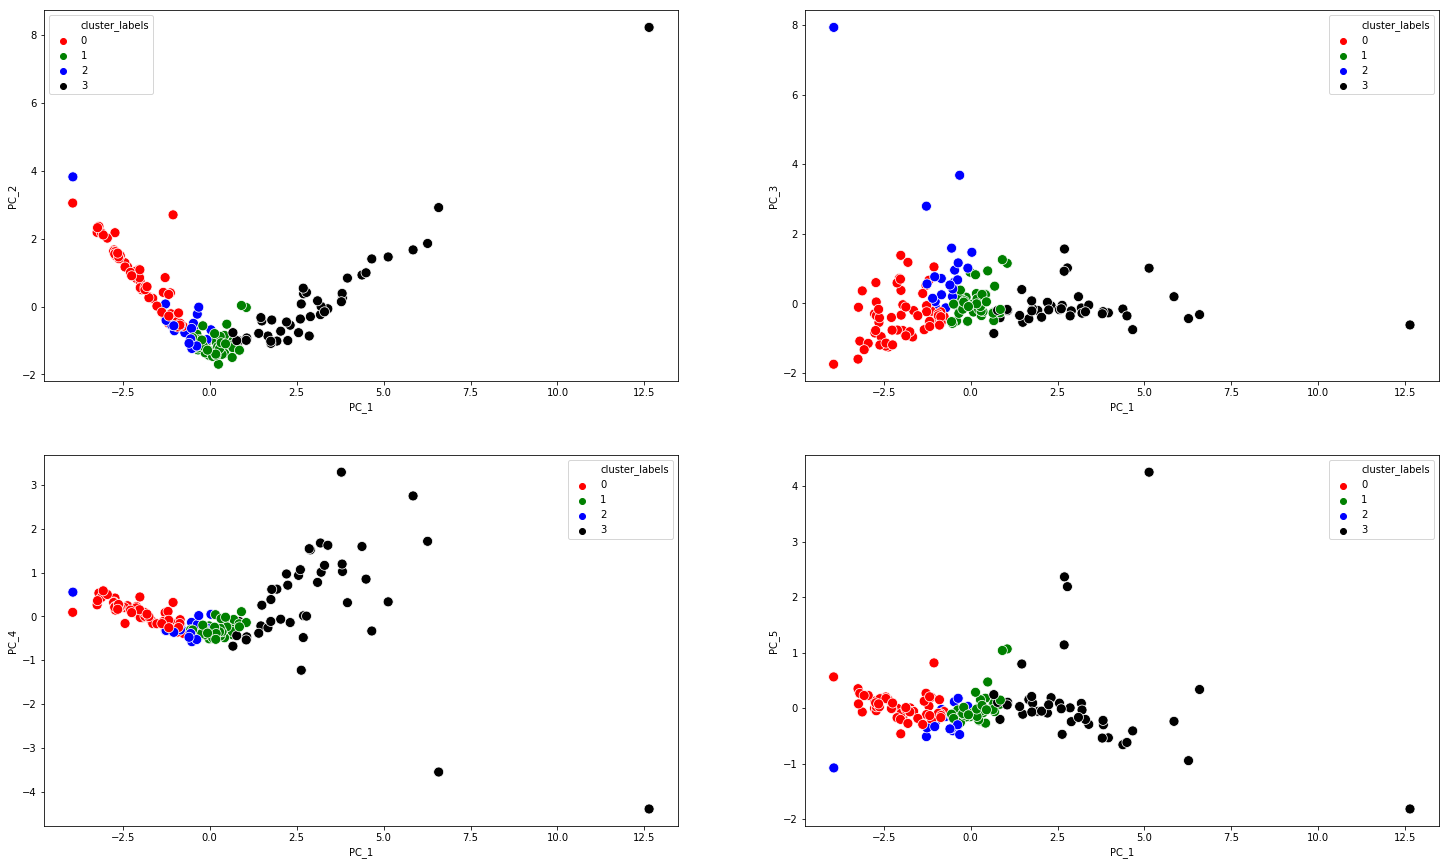

In [54]:
#  Plotting scatter plot between PC_1-PC_2, PC_1-PC_3, PC_1-PC_4 and PC_1-PC_5
plt.figure(figsize = (25,15))
plt.subplot(2,2,1)
sns.scatterplot(x='PC_1',y='PC_2',hue='cluster_labels',data=df_final,palette=['Red','Green','Blue','Black'],s=100)
plt.subplot(2,2,2)
sns.scatterplot(x='PC_1',y='PC_3',hue='cluster_labels',data=df_final,palette=['Red','Green','Blue','Black'],s=100)
plt.subplot(2,2,3)
sns.scatterplot(x='PC_1',y='PC_4',hue='cluster_labels',data=df_final,palette=['Red','Green','Blue','Black'],s=100)
plt.subplot(2,2,4)
sns.scatterplot(x='PC_1',y='PC_5',hue='cluster_labels',data=df_final,palette=['Red','Green','Blue','Black'],s=100)
plt.show()

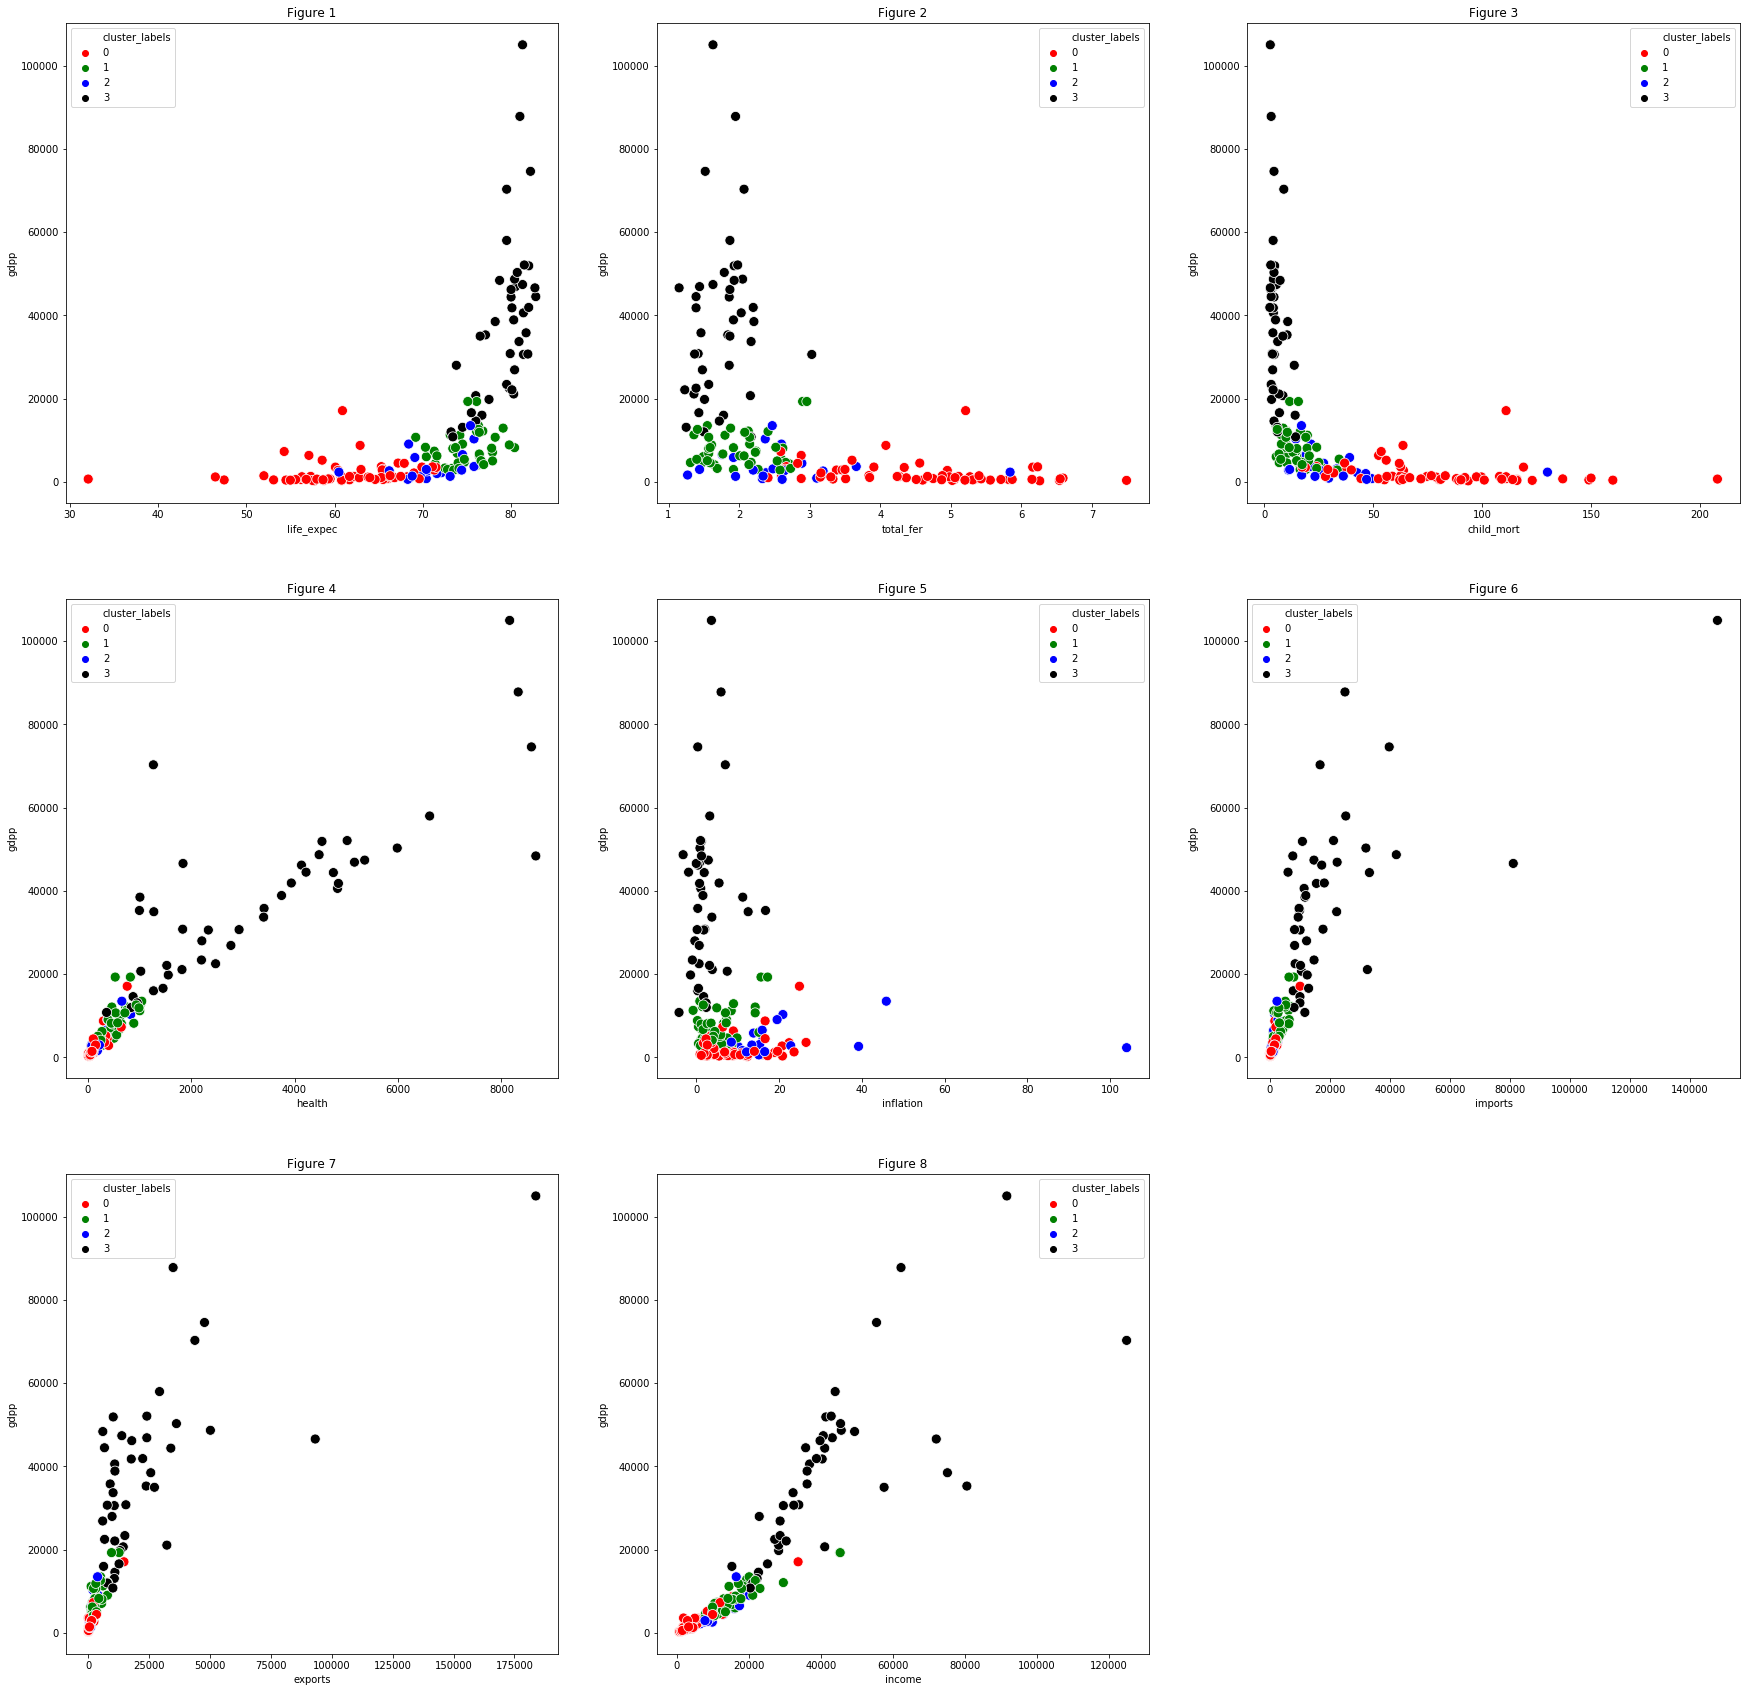

In [55]:
# Cluster 0 seems to contain under-developed countries but lets move forward for more analysis.
# Assigning cluster_labels obtained above in main dataframe df as column cluster_labels and plotting scatter plot on different
# variables taking hue as cluster_labels.
df['cluster_labels'] = cluster_labels
plt.figure(figsize = (30,30))
plt.subplot(3,3,1)
plt.title("Figure 1")
sns.scatterplot(x='life_expec',y='gdpp',hue='cluster_labels',data=df,palette=['Red','Green','Blue','Black'],s=100)
plt.subplot(3,3,2)
plt.title("Figure 2")
sns.scatterplot(x='total_fer',y='gdpp',hue='cluster_labels',data=df,palette=['Red','Green','Blue','Black'],s=100)
plt.subplot(3,3,3)
plt.title("Figure 3")
sns.scatterplot(x='child_mort',y='gdpp',hue='cluster_labels',data=df,palette=['Red','Green','Blue','Black'],s=100)
plt.subplot(3,3,4)
plt.title("Figure 4")
sns.scatterplot(x='health',y='gdpp',hue='cluster_labels',data=df,palette=['Red','Green','Blue','Black'],s=100)
plt.subplot(3,3,5)
plt.title("Figure 5")
sns.scatterplot(x='inflation',y='gdpp',hue='cluster_labels',data=df,palette=['Red','Green','Blue','Black'],s=100)
plt.subplot(3,3,6)
plt.title("Figure 6")
sns.scatterplot(x='imports',y='gdpp',hue='cluster_labels',data=df,palette=['Red','Green','Blue','Black'],s=100)
plt.subplot(3,3,7)
plt.title("Figure 7")
sns.scatterplot(x='exports',y='gdpp',hue='cluster_labels',data=df,palette=['Red','Green','Blue','Black'],s=100)
plt.subplot(3,3,8)
plt.title("Figure 8")
sns.scatterplot(x='income',y='gdpp',hue='cluster_labels',data=df,palette=['Red','Green','Blue','Black'],s=100)
plt.show()

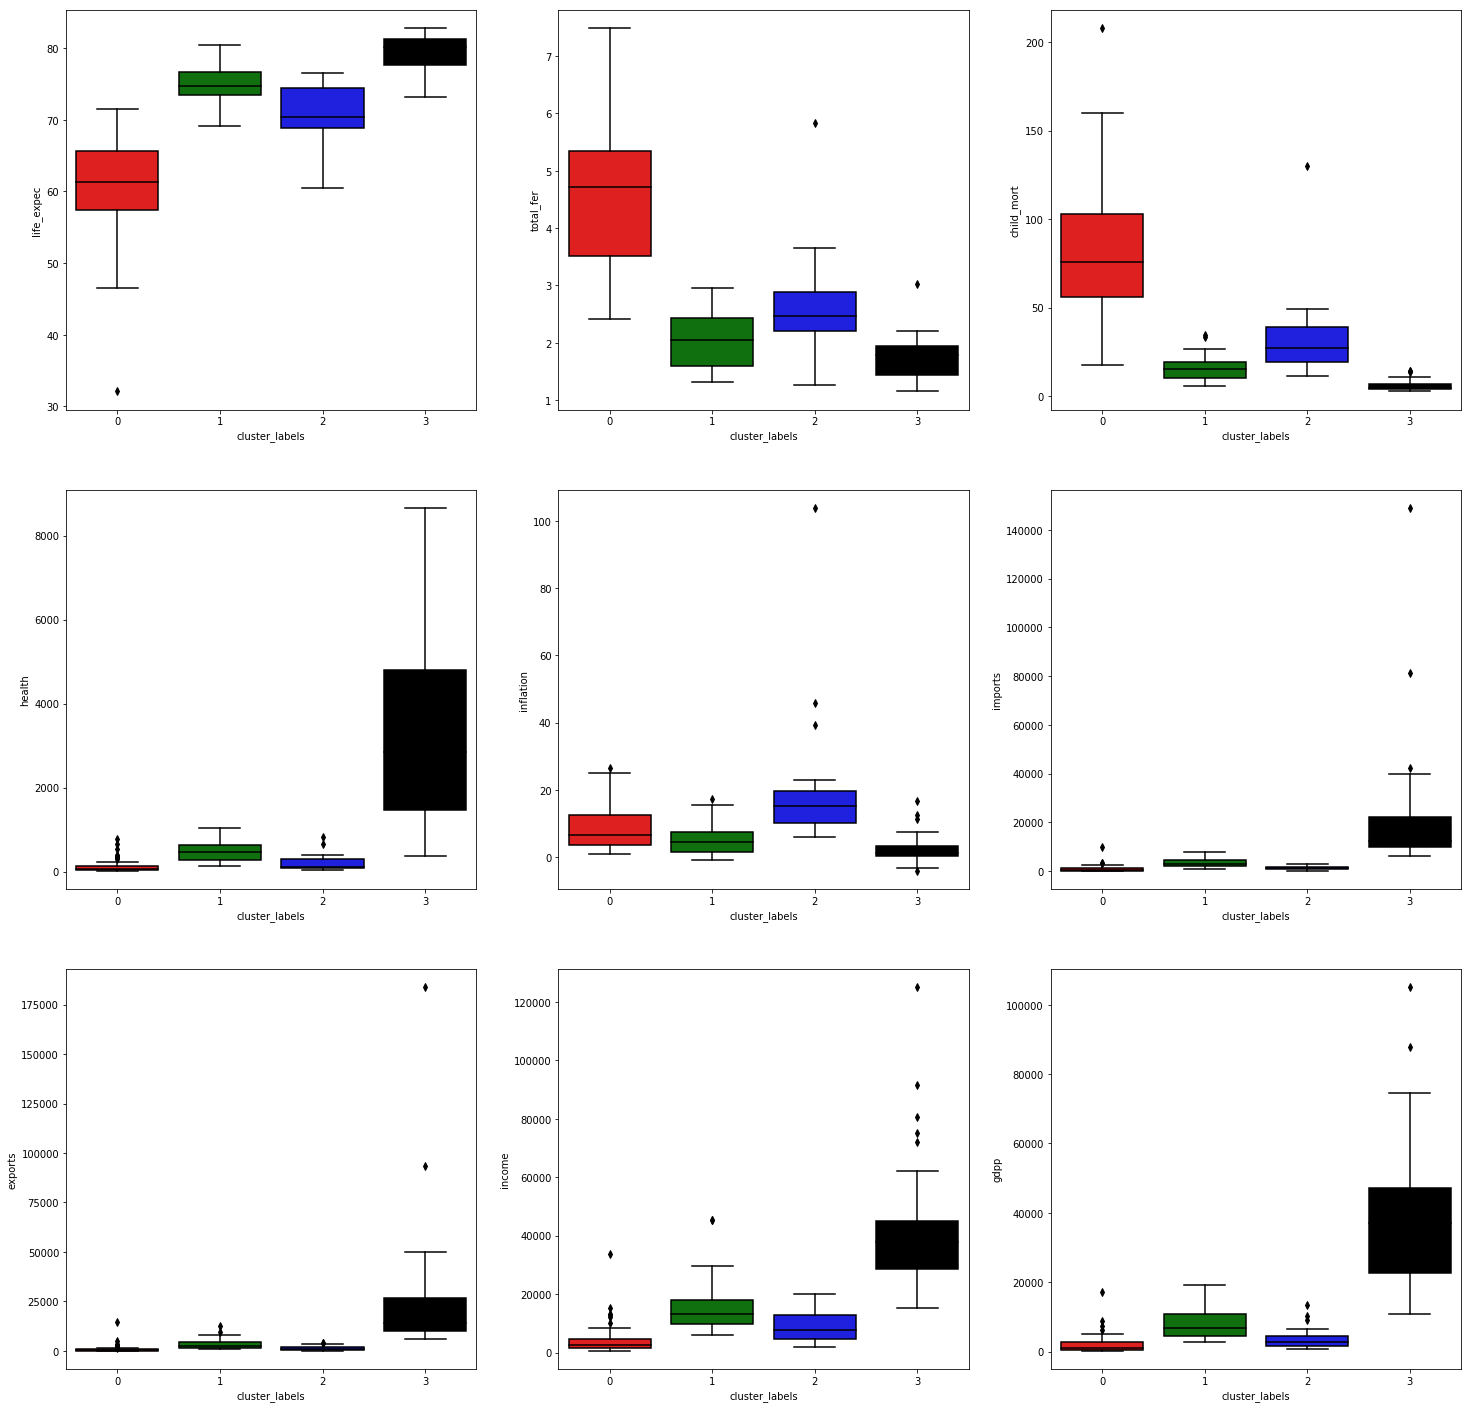

In [56]:
# Plotting boxplots to get better idea of clusters
plt.figure(figsize = (25,25))
plt.subplot(3,3,1)
sns.boxplot(x='cluster_labels',y='life_expec',data=df,palette=['Red','Green','Blue','Black'])
plt.subplot(3,3,2)
sns.boxplot(x='cluster_labels',y='total_fer',data=df,palette=['Red','Green','Blue','Black'])
plt.subplot(3,3,3)
sns.boxplot(x='cluster_labels',y='child_mort',data=df,palette=['Red','Green','Blue','Black'])
plt.subplot(3,3,4)
sns.boxplot(x='cluster_labels',y='health',data=df,palette=['Red','Green','Blue','Black'])
plt.subplot(3,3,5)
sns.boxplot(x='cluster_labels',y='inflation',data=df,palette=['Red','Green','Blue','Black'])
plt.subplot(3,3,6)
sns.boxplot(x='cluster_labels',y='imports',data=df,palette=['Red','Green','Blue','Black'])
plt.subplot(3,3,7)
sns.boxplot(x='cluster_labels',y='exports',data=df,palette=['Red','Green','Blue','Black'])
plt.subplot(3,3,8)
sns.boxplot(x='cluster_labels',y='income',data=df,palette=['Red','Green','Blue','Black'])
plt.subplot(3,3,9)
sns.boxplot(x='cluster_labels',y='gdpp',data=df,palette=['Red','Green','Blue','Black'])
plt.show()

In [57]:
# Based on the scatter plot and boxplot above, it has been clear that:
# Cluster 0 represents under-developed countries
# Cluster 1 represents emerging countries
# Cluster 2 represents developing countries
# Cluster 3 represents developed countries.
# Cluster 0 has low life_expec, high_fertility, high child mortality, low health, low imports/exports, low income and low GDP. 
# These all factors shows that Cluster 0 belongs to under-developed countries.
# A new cluster has been added during running Hierarchial Clustering which shows as much more insight of data. New cluster i.e.
# Cluster 1 is between developing countries and developed countries and are said to be emerging countries. We can get these 
# countries by looking into dendogram.

In [58]:
# Printing all under-developed countries and making a new dataframe df_und_dev_hc that contain all under-developed countries.
df_und_dev_hc=df_main[df["cluster_labels"]==0]
print(df_und_dev_hc)

                      country  child_mort      exports    health  \
0                 Afghanistan        90.2     55.30000   41.9174   
3                      Angola       119.0   2199.19000  100.6050   
17                      Benin       111.0    180.40400   31.0780   
21                   Botswana        52.5   2768.60000  527.0500   
25               Burkina Faso       116.0    110.40000   38.7550   
26                    Burundi        93.6     20.60520   26.7960   
27                   Cambodia        44.4    425.22600   44.6448   
28                   Cameroon       108.0    290.82000   67.2030   
31   Central African Republic       149.0     52.62800   17.7508   
32                       Chad       150.0    330.09600   40.6341   
36                    Comoros        88.2    126.88500   34.6819   
37           Congo, Dem. Rep.       116.0    137.27400   26.4194   
38                Congo, Rep.        63.9   2331.74000   67.4040   
40              Cote d'Ivoire       111.0    617

In [59]:
# Describing df_und_dev_hc dataframe.
print(df_und_dev_hc.describe(percentiles=[0.25,0.50,0.65,0.75,0.95]))

       child_mort       exports      health       imports        income  \
count   60.000000     60.000000   60.000000     60.000000     60.000000   
mean    79.730000    908.033399  120.736075    948.877502   4113.216667   
std     37.603878   2054.542972  155.393333   1445.831302   5104.711616   
min     17.400000      1.076920   12.821200      0.651092    609.000000   
25%     55.800000    108.634500   36.813600    203.651500   1427.500000   
50%     75.700000    269.910000   54.142250    415.657000   2430.000000   
65%     90.370000    447.473000   80.078350    750.213000   3350.500000   
75%    102.750000    686.610000  136.383750   1267.577500   4605.000000   
95%    149.050000   2799.556000  412.166500   2441.924500  12730.000000   
max    208.000000  14671.800000  766.080000  10071.900000  33700.000000   

       inflation  life_expec  total_fer          gdpp       PC_1       PC_2  \
count  60.000000   60.000000  60.000000     60.000000  60.000000  60.000000   
mean    8.880417

In [60]:
# Based on above description, we are filtering out top 10 countries which are very much in need of aid and printing them.
df_ans_hc = df_und_dev_hc[df_und_dev_hc['gdpp']<=932]
df_ans_hc = df_ans_hc[df_ans_hc['child_mort']>=100]
df_ans_hc = df_ans_hc[df_ans_hc['income']<=1860]
print(df_ans_hc)

                      country  child_mort  exports   health  imports  income  \
17                      Benin       111.0  180.404  31.0780  281.976    1820   
25               Burkina Faso       116.0  110.400  38.7550  170.200    1430   
31   Central African Republic       149.0   52.628  17.7508  118.190     888   
37           Congo, Dem. Rep.       116.0  137.274  26.4194  165.664     609   
63                     Guinea       109.0  196.344  31.9464  279.936    1190   
64              Guinea-Bissau       114.0   81.503  46.4950  192.544    1390   
66                      Haiti       208.0  101.286  45.7442  428.314    1500   
106                Mozambique       101.0  131.985  21.8299  193.578     918   
112                     Niger       123.0   77.256  17.9568  170.868     814   
132              Sierra Leone       160.0   67.032  52.2690  137.655    1220   

     inflation  life_expec  total_fer  gdpp      PC_1      PC_2      PC_3  \
17       0.885        61.8       5.36   75

#### Hence it can be stated that both K Means and Hierarchial Clustering giving nearly same result if talking on under-developed countries. After filtering results in both types of clustering, we are getting same top 10 countries as listed below:
- Benin
- Burkina Faso
- Central African Republic  
- Congo, Dem. Rep.
- Guinea 
- Guinea-Bissau 
- Haiti 
- Mozambique
- Niger
- Sierra Leone